In [2]:
import pandas as pd


In [3]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)



In [4]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])



In [6]:
orders_compl = orderlines


In [7]:
p_df = (
orders_compl
    # create two new columns in our dataframe; year and month
    .assign(year = orderlines['date'].dt.strftime('%Y'), 
           month = orderlines['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_price':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df



,year,month,total_price
0,2017,Apr,4315507.96
1,2017,Aug,4344774.28
2,2017,Dec,17900720.52
3,2017,Feb,4354114.34
4,2017,Jan,5739694.72
5,2017,Jul,5945138.91
6,2017,Jun,5422795.03
7,2017,Mar,5320139.31
8,2017,May,4152973.69
9,2017,Nov,20291968.74


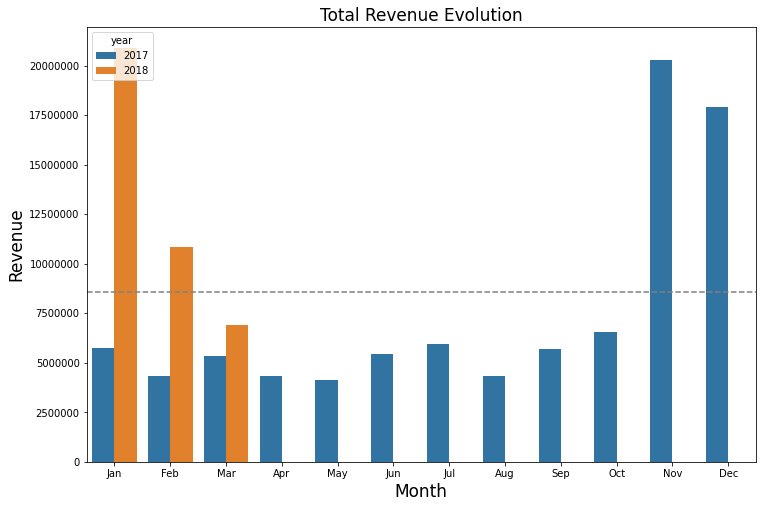

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
months=['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']
plt.subplots(figsize=(12,8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_price', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_price'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month',fontsize=17) # x label name
plt.ylabel('Revenue',fontsize=17) # y label name
plt.title('Total Revenue Evolution',fontsize=17) # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

-0.2105077586456607


,total_price,"discounts,%"
total_price,0.0,0.4514
"discounts,%",0.4514,0.0


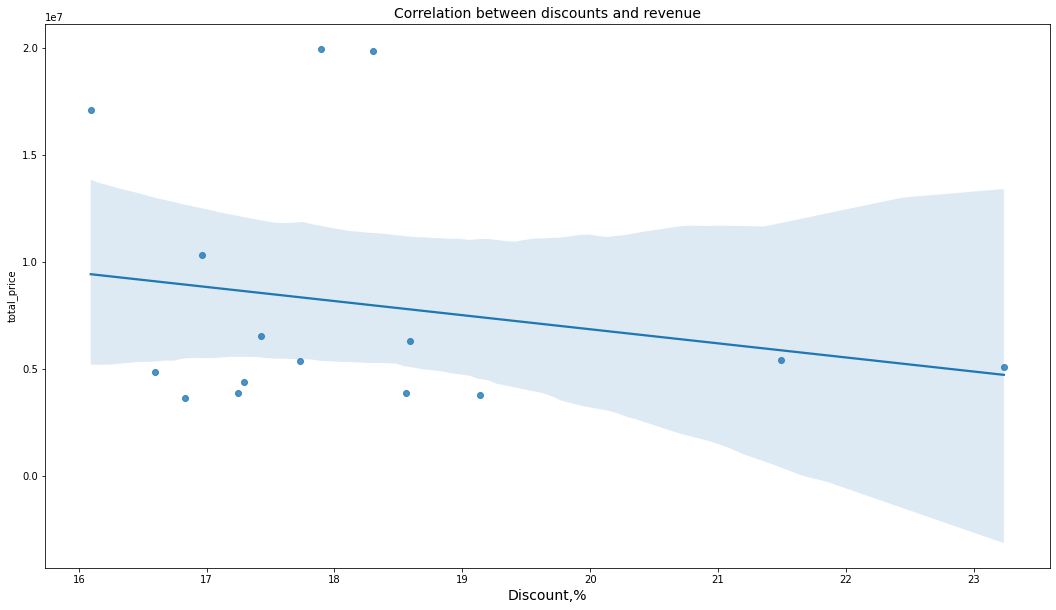

In [13]:
from IPython.core.pylabtools import figsize#Code to build correlation between revenue and discounts
plt.subplots(figsize=(18,10))
corrplot_discounts_revenue=sns.regplot(x = discounts_needed_1_grouped['discounts,%'],y = discounts_needed_1_grouped['total_price'])
corrplot_discounts_revenue.set_xlabel('Discount,%',fontsize=14)
plt.title('Correlation between discounts and revenue',fontsize=14)
corr=discounts_needed_1_grouped['discounts,%'].corr(discounts_needed_1_grouped['total_price'])#Correlation coefficient
print(corr)
#Below is calculation of a p-value
from scipy.stats import pearsonr
import pandas as pd
def calculate_pvalues(df):
    #df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues
data=[discounts_needed_1_grouped['total_price'],discounts_needed_1_grouped['discounts,%']]
headers=['total_price','discounts,%']
data1=pd.concat(data,axis=1,keys=headers)
data1
calculate_pvalues(data1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sku               293743 non-null  object        
 1   name              292328 non-null  object        
 2   desc              292315 non-null  object        
 3   unit_price        293743 non-null  float64       
 4   price             285001 non-null  float64       
 5   discount          285001 non-null  float64       
 6   date              293743 non-null  datetime64[ns]
 7   product_quantity  293743 non-null  int64         
 8   id_order          293743 non-null  int64         
 9   total_price       293743 non-null  float64       
 10  multiplier        293743 non-null  int64         
 11  discounts,%       285001 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 26.9+ MB


Text(0.5, 1.0, 'Discounts evolution through 2017 and 2018')

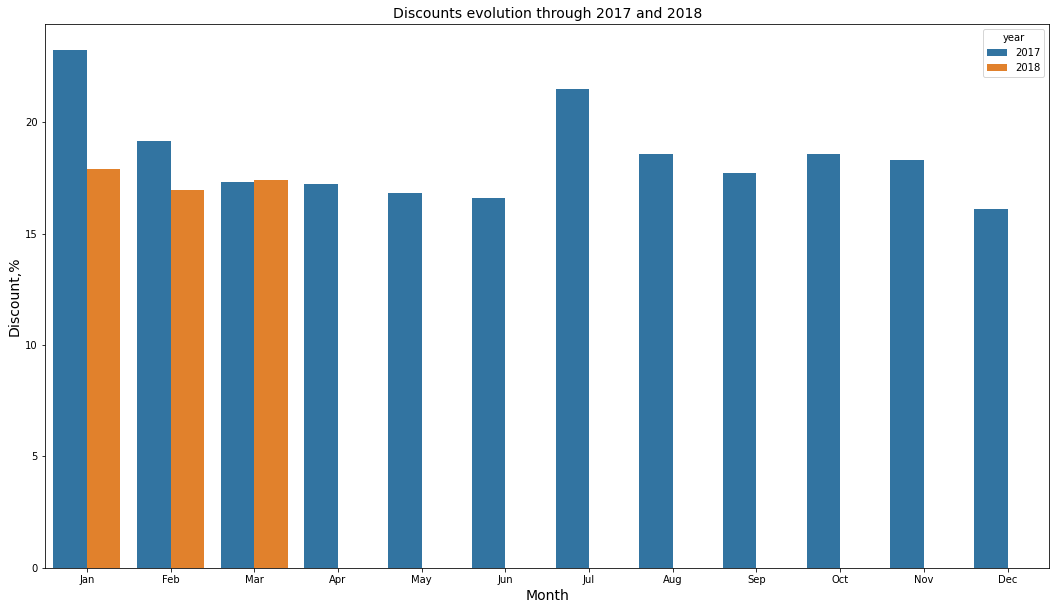

In [12]:
#The code below shows discounts per months and years
discounts=orderlines.join(products.set_index('sku'), on='sku')
discounts.head(10)
discounts['discount']=1-discounts['unit_price']/discounts['price']
discounts_needed=discounts[['sku','name','desc','unit_price','price','discount','date','product_quantity','id_order','total_price']]
discounts_needed=discounts_needed.assign(multiplier=100)
discounts_needed.head()
discounts_needed['discounts,%']=discounts_needed['multiplier']*discounts_needed['discount']
discounts_needed.info()
discounts_needed.discount.describe()
discounts_needed['discounts,%'].describe()
discounts_needed.loc[discounts_needed['discounts,%']==-89279.79]
discounts_needed_1=discounts_needed.loc[(discounts_needed['discount']>=0)&(discounts_needed['discount']<=1)]
discounts_needed_1_grouped=(discounts_needed_1
                            .assign(year=discounts_needed_1['date'].dt.strftime('%Y'),month=discounts_needed_1['date'].dt.strftime('%b'))
                            .groupby(['year','month'])
                            .agg({'discounts,%':'mean','total_price':'sum'})
                            .reset_index()
                            .sort_values(['year','month']))
discounts_needed_1_grouped
plt.subplots(figsize=(18,10))
months=['Jan','Feb','Mar','Apr','May','Jun',
        'Jul','Aug','Sep','Oct','Nov','Dec']
discountsplot=sns.barplot(data=discounts_needed_1_grouped,
                          x='month',
                          y='discounts,%',
                          hue='year',
                          order=months)
discountsplot.set_xlabel('Month',fontsize=14)
discountsplot.set_ylabel('Discount,%',fontsize=14)
plt.title('Discounts evolution through 2017 and 2018',fontsize=14)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sku                   10579 non-null  object 
 1   name                  10579 non-null  object 
 2   desc                  10572 non-null  object 
 3   price                 9992 non-null   float64
 4   type                  10529 non-null  object 
 5   max_price_orderlines  342 non-null    float64
 6   brand                 10579 non-null  object 
 7   category              10579 non-null  object 
dtypes: float64(2), object(6)
memory usage: 661.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   sku               293743 non-null  object        
 1   name              292328 non-null  object      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
Int64Index: 192885 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     192885 non-null  int64         
 1   sku          192885 non-null  object        
 2   date         192885 non-null  datetime64[ns]
 3   category     192885 non-null  object        
 4   brand        192885 non-null  object        
 5   discount     192885 non-null  float64       
 6   discounts,%  192885 non-null  float64       
 7   total_paid   192885 non-null  float64       
 8   label        192885 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 14.7+ MB


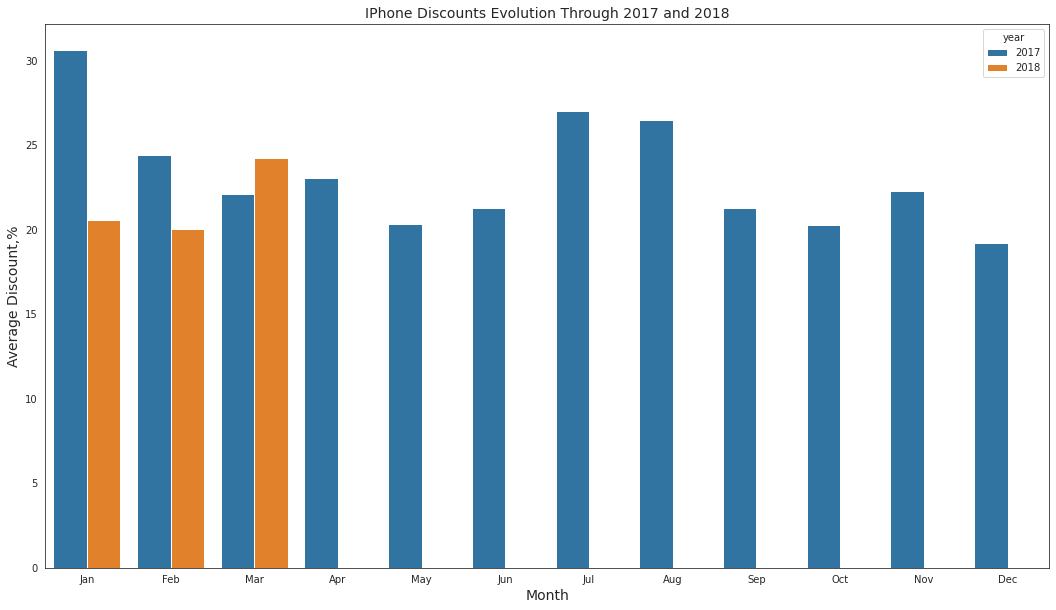

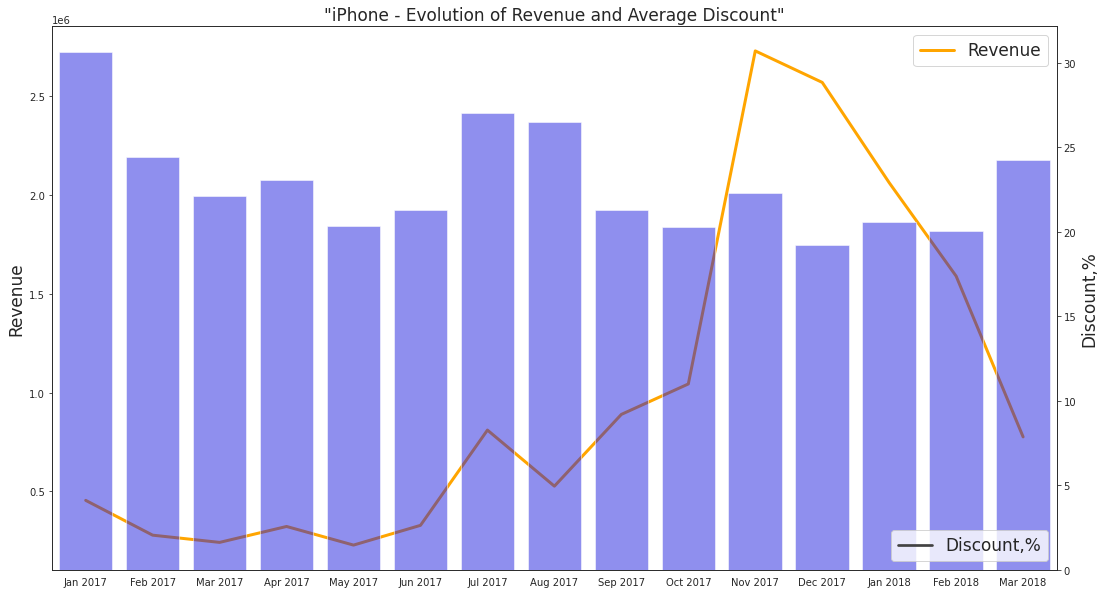

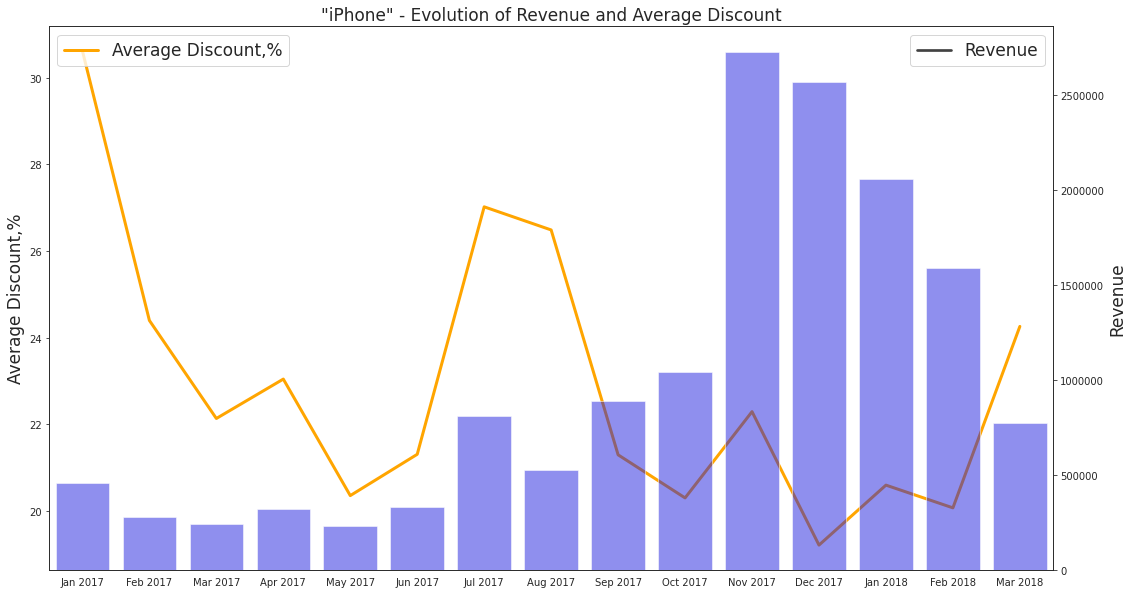

In [16]:
# Below is the code to create categories of Eniac products based on their description
import numpy as np
products['brand'] = pd.np.where(products.sku.str.contains("APP"), "Apple",
                   pd.np.where(products.sku.str.contains("KIN"), "Kingston",
                   pd.np.where(products.sku.str.contains("SEN"), "Sennheiser", 
                   pd.np.where(products.sku.str.contains("RAI"),"Rain","other"))))
                    #Brand works OK
products
products['category']=pd.np.where(products.desc.str.contains("Macbook"),"Macbook", 
                      pd.np.where(products.desc.str.contains("iMac"),"iMac",
                      pd.np.where(products.desc.str.contains("ipod"),"ipod",
                      pd.np.where(products.desc.str.contains("iPhone"),"IPhone",
                      pd.np.where(products.desc.str.contains("tablet"),"tablet",
                      pd.np.where(products.desc.str.contains("ipad"),"tablet",
                      pd.np.where(products.desc.str.contains("cable"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("adapter"),"cable&adapters",
                      pd.np.where(products.desc.str.contains("case"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("tripod"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("mount"),"cases&mounts&protection", 
                      pd.np.where(products.desc.str.contains("glasses"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("backpack"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("magsafe"),"cases&mounts&protection",
                      pd.np.where(products.desc.str.contains("services"),"service&licences",
                      pd.np.where(products.desc.str.contains("license"),"service&licences", 
                      pd.np.where(products.desc.str.contains("drive"),"components",
                      pd.np.where(products.desc.str.contains("stick"),"components",
                      pd.np.where(products.desc.str.contains("RAM"),"components",
                      pd.np.where(products.desc.str.contains("display"),"components",
                      pd.np.where(products.desc.str.contains("mice"),"components",
                      pd.np.where(products.desc.str.contains("keyboard"),"components",
                      pd.np.where(products.desc.str.contains("pen"),"components",            
                      pd.np.where(products.desc.str.contains("headset"),"components",            
                      pd.np.where(products.desc.str.contains("earphone"),"components",            
                      pd.np.where(products.desc.str.contains("LAN"),"network",
                      pd.np.where(products.desc.str.contains("Wifi"),"network",
                      pd.np.where(products.desc.str.contains("router"),"network",
                      pd.np.where(products.desc.str.contains("NAS"),"network",
                      pd.np.where(products.desc.str.contains("FireWire"),"network",
                      pd.np.where(products.desc.str.contains("GoPro"),"GoPro",
                      pd.np.where(products.desc.str.contains("power"),"Power",
                      pd.np.where(products.desc.str.contains("batter"),"Power",
                      pd.np.where(products.desc.str.contains("watch"),"Watches", 
                      pd.np.where(products.desc.str.contains("second-hand"),"Refurbished products",
                      pd.np.where(products.desc.str.contains("refurbished"),"Refurbished products","other"))))))))))))))))))))))))))))))))))))   
                      #seems not working, should use regex  
productsgrcat=products.groupby(['category']).agg({'category':'count'})
productsgrcat
products_groupedbybrand=products.groupby(['brand']).agg({'brand':'count'})
products_groupedbybrand
products.sku.count()

#Below is the code that merges needed databases and then builds 2 graphs 
#(the same data, but different types of visualisation) of association between revenue and discounts for the category "iPhone"
products.info()
discounts_needed.info()
prodsku=products['sku']
prodsku
for x in prodsku:
  if x == any(discounts_needed['sku']):
    discounts_needed['category']=products['category']
discounts_needed.info()
discounts_needed.head(100)
discounts_needed.head()
merged_left=pd.merge(left=discounts_needed, right=products,how='left',left_on='sku',right_on='sku')
merged_left.info()  #Merged_left contains all columns of discounts_needed and columns of products with respective 'sku'
orders.info()
merged_left_withorders = pd.merge(left=merged_left,right=orders, how='left',left_on='id_order',right_on='order_id')
merged_left_withorders.head()
merged_left_withorders.info() #Contains all rows of merged_left with columns from orders. Idea - to separate total_paid
merged_left_withorders_needed = merged_left_withorders.loc[(merged_left_withorders['discount']>=0)&(merged_left_withorders['discount']<=1)]
merged_left_withorders_needed.head()
merged_left_withorders_needed.order_id.describe()
merged_left_withorders_needed.discount.describe()
merged_left_withorders_needed.total_price.describe()
finaldf=merged_left_withorders_needed[['order_id','sku','date','category','brand','discount','discounts,%','total_paid']] #Final database to calculate 20% of products that belong to 80% of sales
finaldf.assign(year=finaldf['date'].dt.strftime('%Y'),month=finaldf['date'].dt.strftime('%b'))
finaldf.sort_values('total_paid',ascending=False)
#Further I remove duplicated order_id as total_paid contains multiple repeated sums
finaldf_withoutduplicating_orders=finaldf.drop_duplicates(subset=['order_id'])
#Sorting the received database in descending order by revenue
finaldf_withoutduplicating_orders.sort_values('total_paid',ascending=False) #Has no year and month, unfortunately
#Three rows below show products and orders that belong to 80% of sales
cumsum=(finaldf_withoutduplicating_orders['total_paid']/finaldf_withoutduplicating_orders['total_paid'].sum()).sort_values().cumsum()
finaldf_withoutduplicating_orders['label']=pd.Series(0,index=cumsum.index).where(cumsum<=0.2,1)
finaldf_withoutduplicating_orders.sort_values('total_paid',ascending=False)
finaldf_withoutduplicating_orders.info()
sales80=finaldf_withoutduplicating_orders[(finaldf_withoutduplicating_orders['label'] > 0)].sort_values('total_paid',ascending=False)
sales80.groupby('category').agg({'total_paid':'sum'})
#The issue with the code above that 'total_paid' contains shipping costs that was not described earlier. Besides, total_paid is for the orders: hence, specific sku corresponds to to the total_paid for the whole order
finaldfcor=merged_left_withorders_needed[['order_id','sku','date','category','brand','discount','discounts,%','total_price']]
finaldfcor.head()
mydf=finaldfcor.assign(year=finaldfcor['date'].dt.strftime('%Y'),month=finaldfcor['date'].dt.strftime('%b'))  #Database that contains all categories, discounts, products, with year and month columns
mydf.head()
filter=mydf['category'].isin(['IPhone','components','other','iMac'])
mydf4cat=mydf[filter]  #Only 4 categories
mydf4cat.head()
filter1=mydf4cat['category'].isin(['IPhone'])
mydfIPhone=mydf4cat[filter1]  #Only IPhone category
mydfIPhone.head()
IPhonegrouped=(mydfIPhone
               .groupby(['year','month'])
               .agg({'discounts,%':'mean','total_price':'sum'})
               .reset_index()
               .sort_values(['year','month']))
IPhonegrouped
plt.subplots(figsize=(18,10))
months=[4,8,12,2,1,7,
        6,3,5,11,10,9,
        2,1,3]
months
Iphonemonthsorder=IPhonegrouped.assign(order=months)
Iphone=Iphonemonthsorder.sort_values(['year','order'])
Iphone
IPhonediscountplot=sns.barplot(data=Iphone,
                               x='month',
                               y='discounts,%',
                               hue='year')
IPhonediscountplot.set_xlabel('Month',fontsize=14)
IPhonediscountplot.set_ylabel('Average Discount,%',fontsize=14)
plt.title('IPhone Discounts Evolution Through 2017 and 2018',fontsize=14)
x_label=['Jan 2017','Feb 2017','Mar 2017','Apr 2017','May 2017','Jun 2017','Jul 2017','Aug 2017','Sep 2017','Oct 2017','Nov 2017','Dec 2017',
         'Jan 2018','Feb 2018','Mar 2018']
Revenue=Iphone['total_price']        
Revenue.describe()
Discount=Iphone['discounts,%']
Discount
IphoneDf=pd.DataFrame({'Revenue': Iphone['total_price'], 'Discount,%': Iphone['discounts,%']},index=x_label)
IphoneDf
plt.subplots(figsize=(18,10))
ax1=sns.lineplot(x=x_label, y=Revenue,data=Iphone,color='orange',linewidth=3.0)
ax1.set_ylabel('Revenue',fontsize=17)
ax1.legend(['Revenue'],loc='upper right',fontsize=17)
ax1.grid(False)
ax2=ax1.twinx()
sns.barplot(x=x_label, y=Discount,data=Iphone,color='blue',alpha=0.5,ax=ax2 )
ax2.grid(b=False)
ax2.set_ylabel('Discount,%',fontsize=17)
ax2.legend(['Discount,%'],loc='lower right',fontsize=17)
sns.set_style("white")
plt.title('"iPhone - Evolution of Revenue and Average Discount"', fontsize=17)
plt.show()
plt.subplots(figsize=(18,10))
ax1=sns.lineplot(x=x_label,y=Discount,data=Iphone, color='orange',linewidth=3.0)
ax1.set_ylabel('Average Discount,%',fontsize=17)
ax1.legend(['Average Discount,%'],loc='upper left',fontsize=17)
ax1.grid(False)
ax2=ax1.twinx()
sns.barplot(x=x_label,y=Revenue,data=Iphone,color='blue',alpha=0.5,ax=ax2)
ax2.grid(b=False)
ax2.set_ylabel('Revenue',fontsize=17)
plt.ticklabel_format(axis='y',style='plain')
ax2.legend(['Revenue'],loc='upper right',fontsize=17)
sns.set_style("white")
plt.title('"iPhone" - Evolution of Revenue and Average Discount',fontsize=17)
plt.show()

          
          


